# Recurrent Neural Network Simplified (Google Stock Price Forecasting)

### **Goals of the project -** 
* To understand the basic implemetation of the RNN and LSTM
* To build the RNN layer by layer and understanding the significance of LSTM and the arguments used
* Understanding the importance of Normalization in RNN
* To understand the concept of time steps
* Creating training and testing set from the same data by using the concept of time steps
* Comparing the forecast of the actual and predicted stock prices
* Understanding the significance of RNN in terms of forecasting and its limitations
* Evaluating the RNN by RMSE value taken as a percentage of the orignal value

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 1** : Pre-processing

In [2]:
import numpy as np
import pandas as pd
import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

In [3]:
training = pd.read_csv("/content/drive/MyDrive/College/DL/Assignment4/Google_Stock_Price_Train.csv")
training.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**Things to consider -**
* For this project sake we will be considering only the "Open" value of the stock as we are building the RNN
* This is done because in RNN, one value at a time `t` is given as an input in a module and that in return gives the next predicted value at time `t+1`

In [4]:
real_stock_price_train = training.iloc[:, 1:2].values     # creates a 2D array having observation and feature

In [7]:
real_stock_price_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Step - 1.1 :** Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training2 = sc.fit_transform(real_stock_price_train)

**Note -**
* We prefer `Normalization` over `Standardization` here coz the sigmoid function takes values betn 0 and 1, 
* Hence it would be better to scale our values betn 0 and 1, thus its better to do use `MinMaxScaler`

**Step - 1.2 :** Checking the shape

In [11]:
training2.shape


(1258, 1)

**Step 1.3 :** Getting the input and output values

**Note -**
* The input values must be the stock prices at time `t` and the output values should be the stock prices at time `t+1`

In [12]:
# hence in the input we take
X_train = training2[0:1257]  # all but last observation as we don't have the output value for it
y_train = training2[1:1258]  # values shifted by 1

In [14]:
X_train.shape

(1257, 1)

**Step 1.4 :** Reshaping
* We need to convert this 2D (observation and feature)array into a 3D array because it is a time series problem
* So we need to add a *time step* of 1 because our input is stock price at time `t` and output is stock price at time `t+1` and `(t+1) - t = 1`, hence `1` is the time step

In [15]:
X_train = np.reshape(X_train, (1257, 1, 1))
# (1257, 1, 1) the 2nd argument is no. of features and 3rd argument is the time step

## **Step - 2 :** Building the RNN

In [16]:
# importing libraries
from keras.models import Sequential  # initialize NN as a sequnce of layers
from keras.layers import Dense  # to add fully connected layers
from keras.layers import LSTM

**Step 2.1 :** Initializing the RNN

In [17]:
rnn_regressor = Sequential()

**Step 2.2 :** Adding input layer and LSTM layer
* In the add method, we use the class corresponding to the layer we want to add
* In this case we are adding the LSTM layer thus replacing the input layer (Dense class) by the LSTM class

In [18]:
rnn_regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(1, 1)))

**Arguments used -**
* `units` = no. of memory units
* `input_shape=(1, 1)` means the 1st element is the time step and the 2nd element is no. of features

**Step 2.3 :** Adding the output layer

In [19]:
rnn_regressor.add(Dense(units=1))

**Arguments used -**
* `units` = no. of neurons in output layer, here it is a regressor hence 1

**Step 2.4 :** Compiling the RNN

In [20]:
rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')

**Step 2.5 :** Fitting the RNN to training set

In [21]:
rnn_regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.0812
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0719
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 5/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0636
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0463
Epoch 13/200
40/40 [=================

**Step 2.6 :** Predicting and Visualizing the training results

In [22]:
# predicting the training results
predicted_stock_price_train = rnn_regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

40/40 [==============================] - 0s 1ms/step


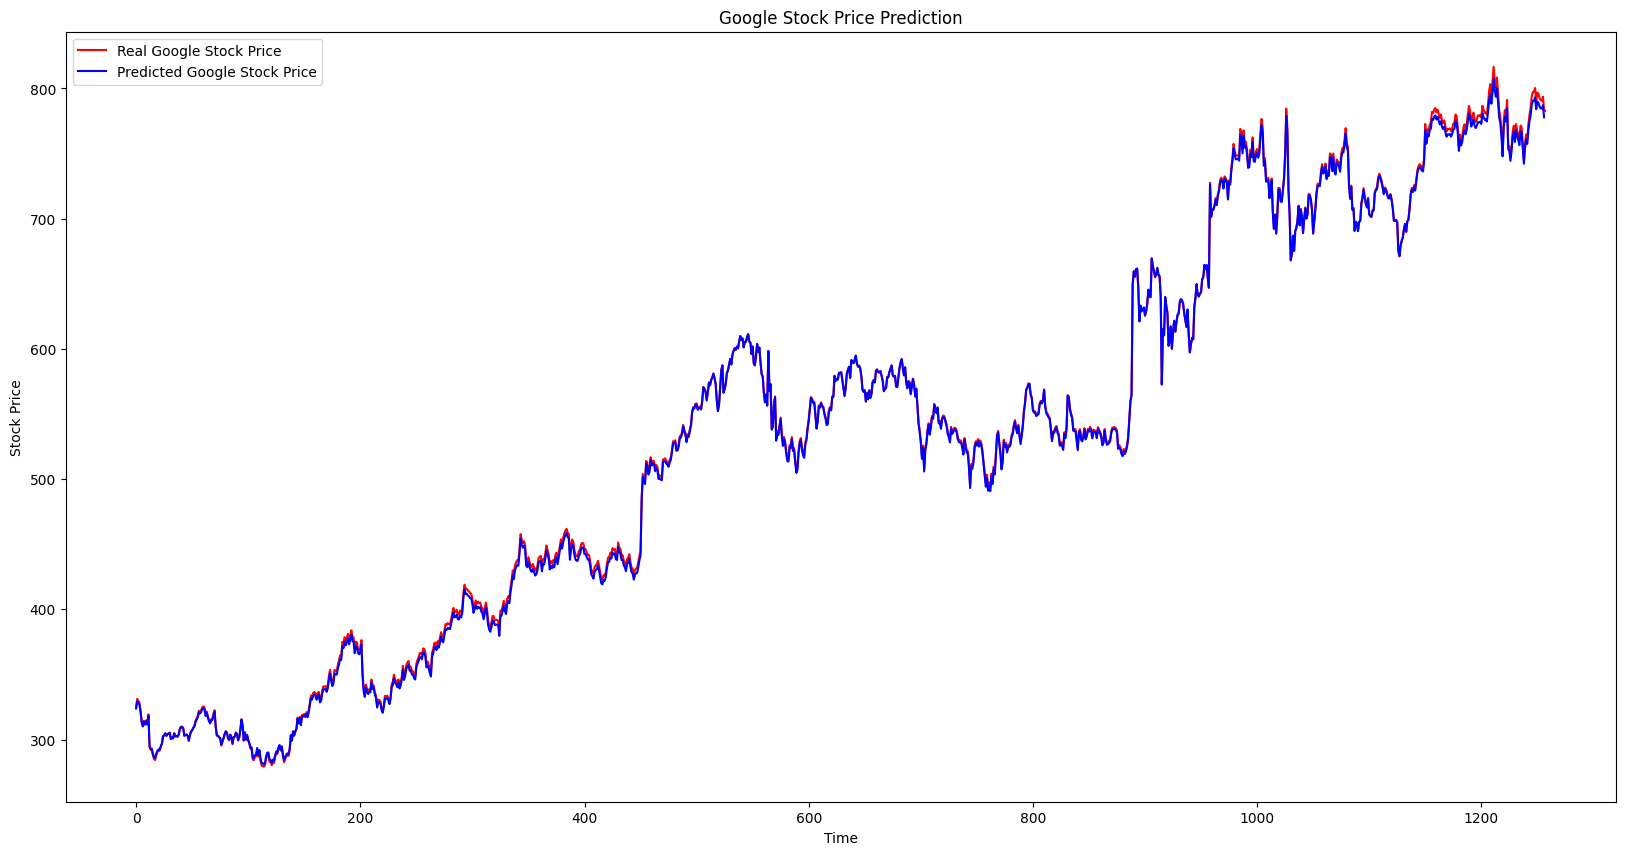

In [23]:
# visualizing the training results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(real_stock_price_train, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Step - 3 :** Making predictions and visualizing results for testing set

In [24]:
testing = pd.read_csv("/content/drive/MyDrive/College/DL/Assignment4/Google_Stock_Price_Test.csv")
testing.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


**Step 3.1 :** Performing similar pre-prcoessing as performed on training set

In [25]:
# taking the column of "open" value of stock price
real_stock_price_test = testing.iloc[:, 1:2].values

In [26]:
# feature Scaling
inputs = sc.transform(real_stock_price_test)

**Note -** We do only ".transform" and not "fit.transform" and we use the same scaler 'sc' we used while standardzing the training data because the scaling should be done with respect to the training data and not the testing set because the minimum and maximum of the training and testing sets may vary

In [27]:
# reshaping
inputs = np.reshape(inputs, (20, 1, 1))     # only 20 observations in testing set

In [28]:
# predicting the stock price (for the year 2017)
predicted_stock_price_test = rnn_regressor.predict(inputs)     # but these are the scaled values

1/1 [==============================] - 0s 25ms/step


**Step 3.2 :** Performing inverse scaling

In [29]:
predicted_stock_price_test = sc.inverse_transform(predicted_stock_price_test)

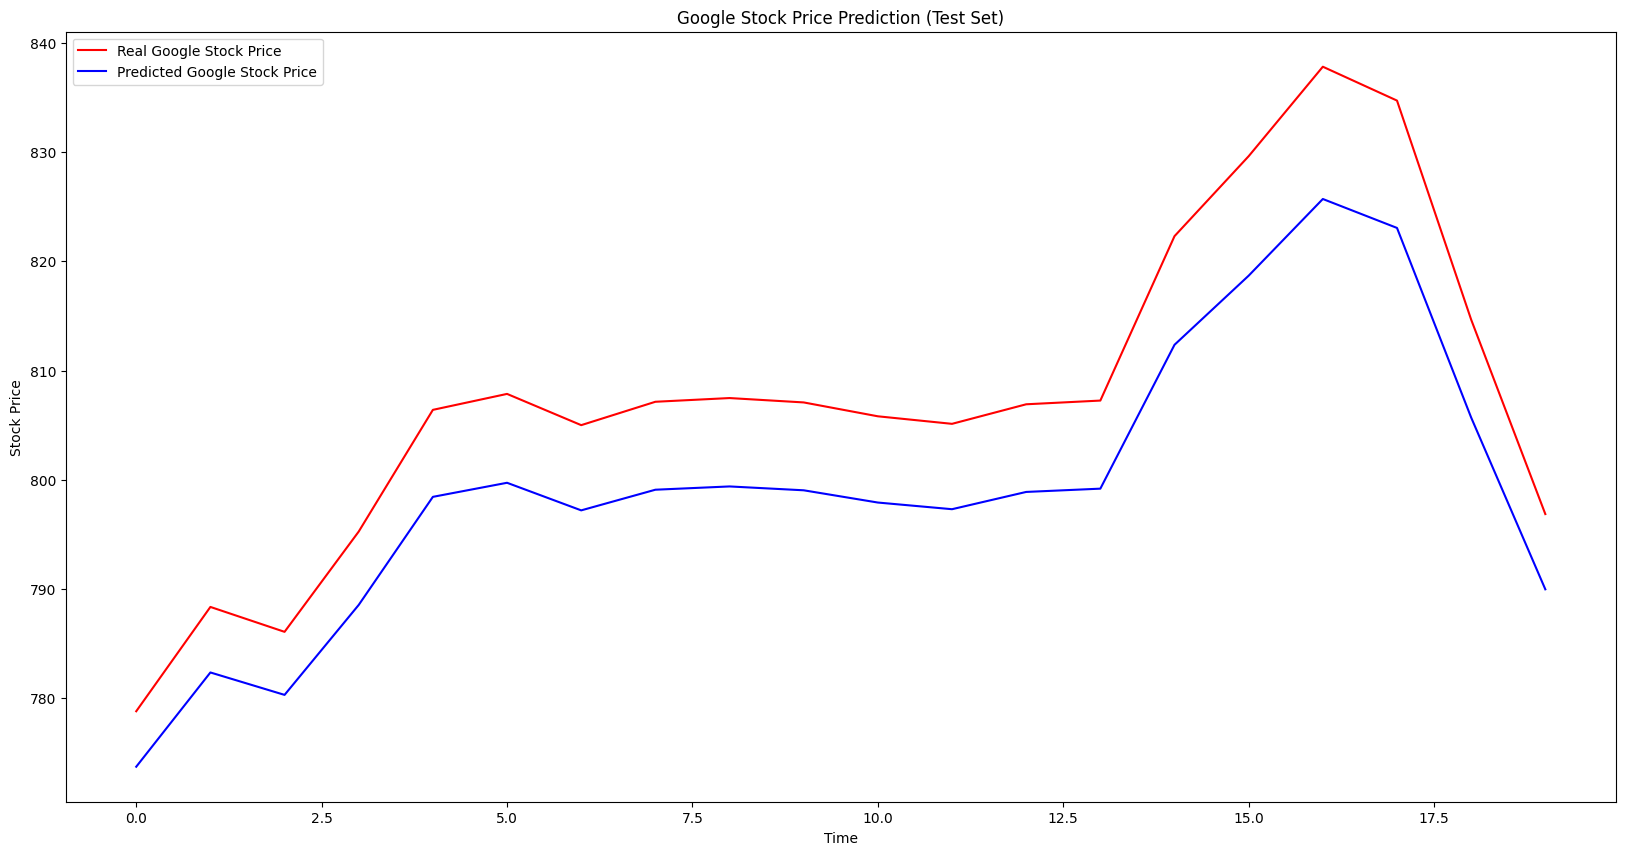

In [30]:
# visualizing the results for testing
plt.figure(figsize=(20,10))
plt.plot(real_stock_price_test, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price_test, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Conclusions**
* As there is 1 time step between the input and the output, that makes it one time step prediction
* It is seen that the predictions are actually following the real google stock prices
* If we imagine today is the 1st day of 2017 and we want to predict stock price for the next 60 days, we won't get these accurate results as our model was trained for 1 time step prediction
* As amazing as that sounds it would be hard to get such close predictions because in finance, the future variations may not always be dependent on the past, hence its nearly impossible to make long term predictions of stock price

## **Step - 4 :** Evaluating the RNN

### **Interpretation of RMSE value :**
* It is a way of figuring out how much a model disagrees with the actual data

In [31]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(real_stock_price_test, predicted_stock_price_test))
print('The RMSE value is', rmse)

The RMSE value is 8.387804374903904


* We need to express this as percentage of the orignal value coz it may tell there is a prediction error of 7, but that error won't mean the same thing whether the orignal stock price was betn 1 and 10 or betn 1000 and 10000
* Generally a good rmse expressed in terms of percentage is around or less than 1%

In [32]:
print('RMSE in terms of % of the orignal value is', round((rmse/real_stock_price_test.mean()*100), 2) , '%')   
# we take the avg because it would be a true representative of the real stock values

RMSE in terms of % of the orignal value is 1.04 %
